In [2]:
# Importing standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading data
data = pd.read_csv('sales-data.csv', header=None)
data.columns = ['Month','Passengers']
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')
data.tail(10)

,Passengers
Month,
1985-08-01,404
1985-09-01,677
1985-10-01,858
1985-11-01,895
1985-12-01,664
1986-01-01,628
1986-02-01,308
1986-03-01,324
1986-04-01,248


## Time Series Analysis

####  Plot time series data

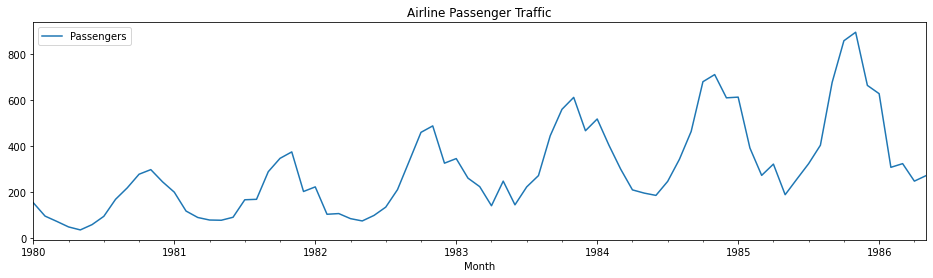

In [4]:
data.plot(figsize=(16,4))
plt.title("Airline Passenger Traffic")
plt.legend(loc='best')
plt.show(block=False)

## Missing values Treatement

#### Mean Interpolation

In [5]:
data.isnull().sum()

Passengers    0
dtype: int64

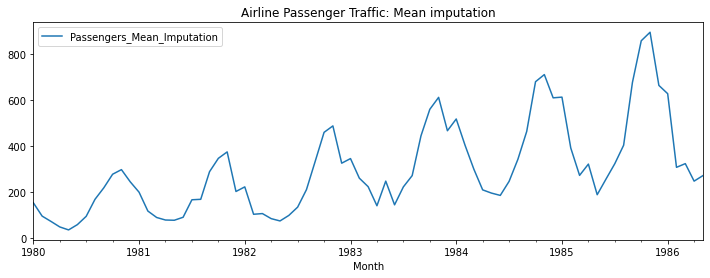

In [6]:
#data['Passengers_Mean_Imputation']=data.Passengers.fillna(data.Passengers.mean())
data = data.assign(Passengers_Mean_Imputation= data.Passengers.fillna(data.Passengers.mean()))
data['Passengers_Mean_Imputation'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline Passenger Traffic: Mean imputation')
plt.show(block=False)

## Linear Interpolation

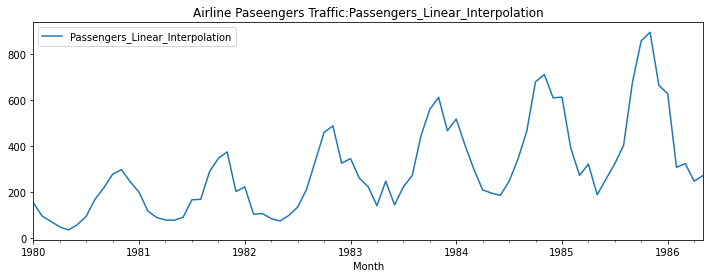

In [7]:
data = data.assign(Passengers_Linear_Interpolation = data.Passengers.interpolate(method='linear'))
data['Passengers_Linear_Interpolation'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline Paseengers Traffic:Passengers_Linear_Interpolation')
plt.show()

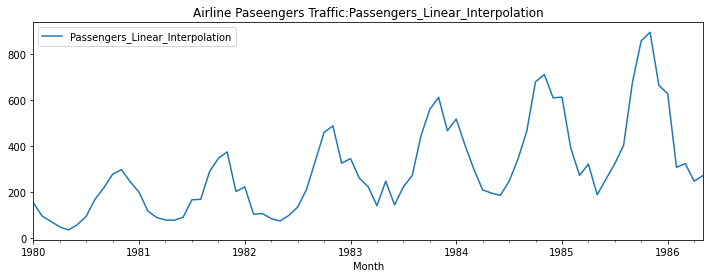

In [8]:
data = data.assign(Passengers_Linear_Interpolation = data.Passengers.interpolate(method='linear'))
data['Passengers_Linear_Interpolation'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline Paseengers Traffic:Passengers_Linear_Interpolation')
plt.show()

In [9]:
data.head()

,Passengers,Passengers_Mean_Imputation,Passengers_Linear_Interpolation
Month,,,
1980-01-01,154,154,154
1980-02-01,96,96,96
1980-03-01,73,73,73
1980-04-01,49,49,49
1980-05-01,36,36,36


In [10]:
# Finally replacing missing values with Linear Interpolations
data['Passengers'] = data['Passengers_Linear_Interpolation']
data.drop(['Passengers_Mean_Imputation','Passengers_Linear_Interpolation'], axis=1, inplace=True)

In [11]:
data.head()

,Passengers
Month,
1980-01-01,154
1980-02-01,96
1980-03-01,73
1980-04-01,49
1980-05-01,36


## Metrail Data

In [12]:
# Loading the dataset
import datetime
rail = pd.read_csv('Metrail+dataset.csv')
rail.columns=['Month','Travellers']
rail['Month']=[datetime.datetime.strptime(x,'%b-%y').strftime('%Y-%m-%d') for x in rail['Month']]
# [datetime.datetime.strptime(x,'%d-%b-%y').strftime('%Y-%m-%d') for x in df]
rail=rail.set_index('Month')
rail.head()

,Travellers
Month,
1991-01-01,1724.0
1991-02-01,1638.0
1991-03-01,1987.0
1991-04-01,1825.0
1991-05-01,NaN


In [13]:
rail.shape

(159, 1)

In [588]:
rail.head(), rail.tail()

(            Travellers
 Month                 
 1991-01-01      1724.0
 1991-02-01      1638.0
 1991-03-01      1987.0
 1991-04-01      1825.0
 1991-05-01         NaN,
             Travellers
 Month                 
 2003-11-01      2091.0
 2003-12-01      2155.0
 2004-01-01      1848.0
 2004-02-01      1852.0
 2004-03-01      2145.0)

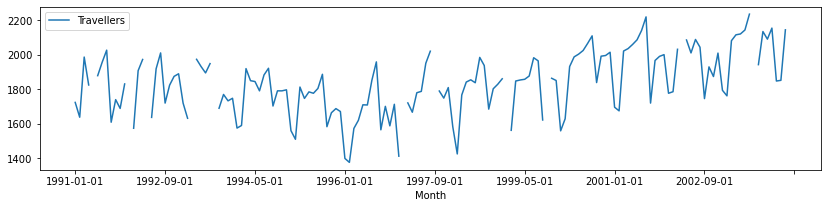

In [589]:
rail.plot(figsize=(14,3))
plt.show(block=True)

In [590]:
# missing values are replaced with the last value observed value
rail[rail.Travellers.isnull()]

,Travellers
Month,
1991-05-01,NaN
1992-01-01,NaN
1992-05-01,NaN
1993-03-01,NaN
1993-08-01,NaN
1997-02-01,NaN
1997-09-01,NaN
1999-01-01,NaN
1999-10-01,NaN


In [591]:
# Use the command fillna(method ='pad')
#rail = rail.fillna(method='pad')
rail['Travellers_pad'] = rail['Travellers'].fillna(method='ffill')

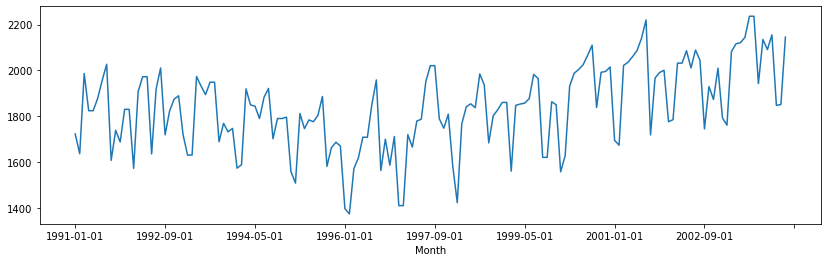

In [592]:
rail['Travellers_pad'].plot(figsize=(14,4))

In [593]:
rail.Travellers_pad.mean()

1838.685534591195

In [594]:
rail['Travellers_bfill'] = rail['Travellers'].fillna(method='bfill')

In [595]:
rail['Travellers_bfill'].mean()

1834.446540880503

In [596]:
rail['Travellers_linear'] = rail['Travellers'].interpolate(method='linear')

In [597]:
rail['Travellers_linear'].mean()

1836.566037735849

# Detecting Outliers

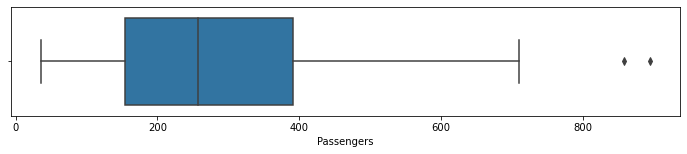

In [14]:
# Airline Passenger Traffic Control
# Boxplot
# Interquartile Range Q3-Q1 (360-180=180)
# 360+(1.5*180) = 630
import seaborn as sns
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(x = data['Passengers'], whis = 1.5)
plt.show()

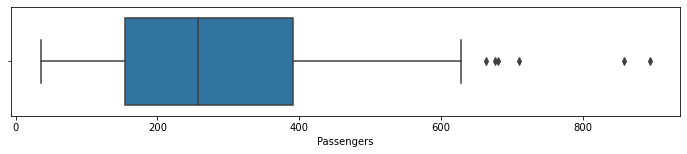

In [15]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(x = data['Passengers'], whis = 1)
plt.show()

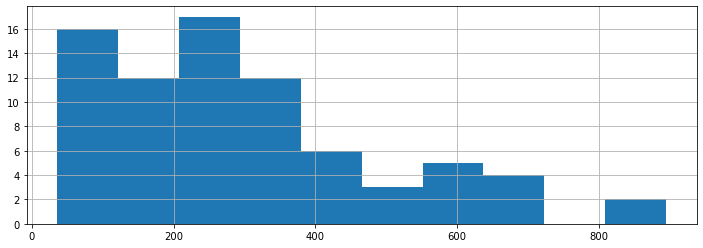

In [16]:
# Outliers using Histogram
fig = data.Passengers.hist(figsize=(12,4))

No outliers detected in above either using boxplot or histogram

# Time Series Decomposition

### Additive Seasonal Decomposition

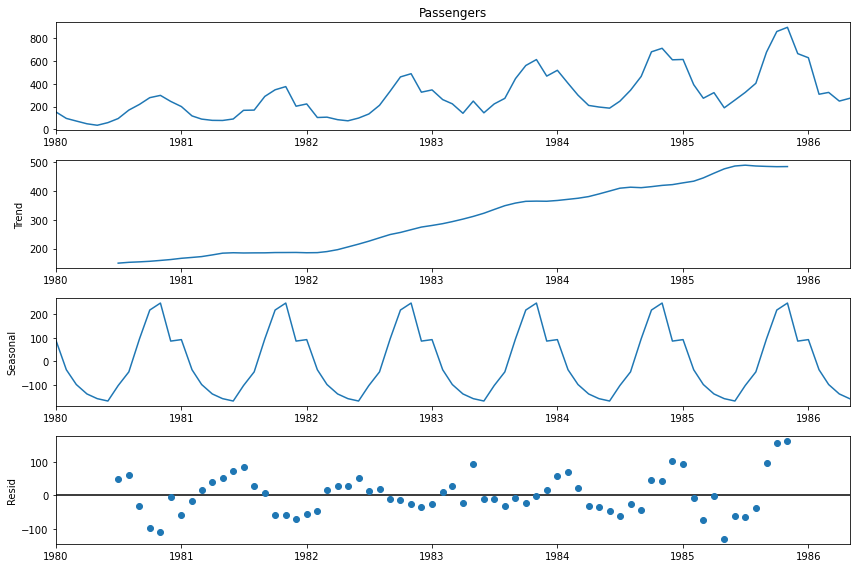

In [17]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize']= 12,8
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='additive') # additive seasonal index
fig=decomposition.plot()
plt.show()

In [18]:
# Multiplicative seasonal decomposition

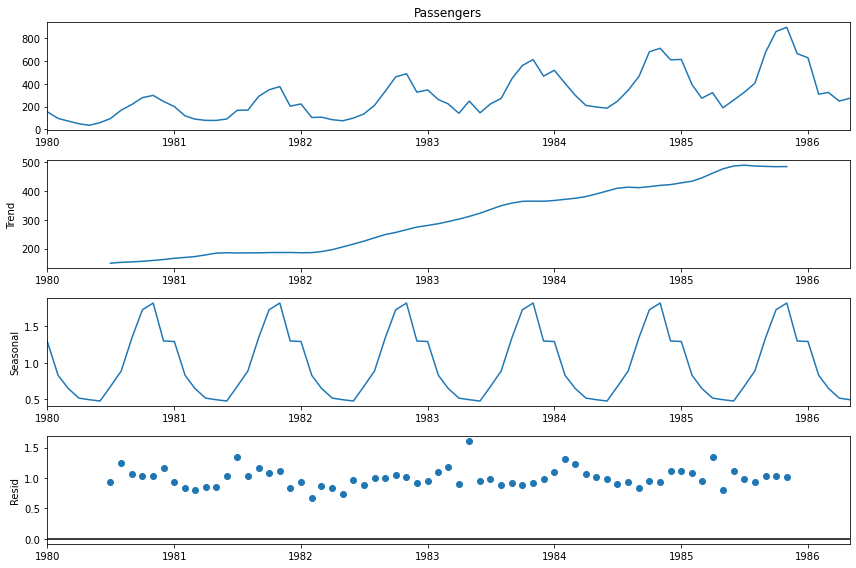

In [19]:
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model = 'multiplicative') # multiplicative seasonal decompose
decomposition.plot()
plt.show()

# Build and evaluate model

### Train and test split

In [20]:
# Splitting data
train_len = 60
train = data[0:train_len]
test = data[train_len:]

In [21]:
test.tail()

,Passengers
Month,
1986-01-01,628
1986-02-01,308
1986-03-01,324
1986-04-01,248
1986-05-01,272


### Naive Method

In [22]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]

In [23]:
y_hat_naive.tail()

,Passengers,naive_forecast
Month,,
1986-01-01,628,610
1986-02-01,308,610
1986-03-01,324,610
1986-04-01,248,610
1986-05-01,272,610


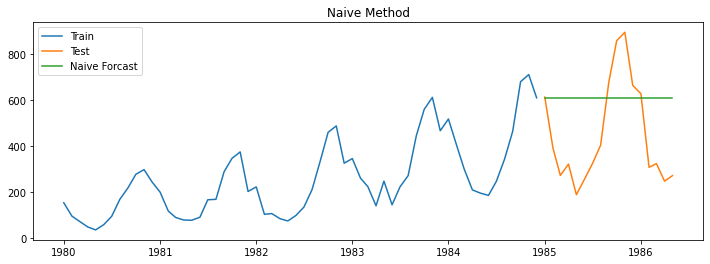

In [24]:
# Plotting train, test, forcast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive Forcast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

# Simple Mean/Average Method

In [25]:
y_hat_mean = test.copy()
y_hat_mean['mean_forecast'] = train['Passengers'].mean()

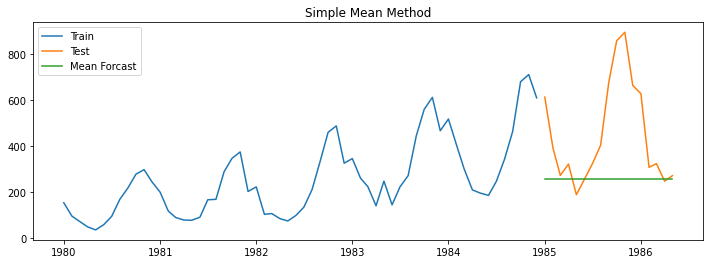

In [26]:
# Plotting train, test, forcast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_mean['mean_forecast'], label='Mean Forcast')
plt.legend(loc='best')
plt.title('Simple Mean Method')
plt.show()

# Calculate RMSE and MAPE

In [27]:
# For the Naive method
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_naive['naive_forecast'])/test['Passengers'])*100,2)

In [28]:
results = pd.DataFrame({'Method': ['Naive method'], 'RMSE':[rmse], 'MAPE':[mape]})

In [29]:
results

,Method,RMSE,MAPE
0,Naive method,269.95,76.86


In [30]:
# Simple Average Method

rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_mean['mean_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_mean['mean_forecast'])/test['Passengers'])*100,2)

In [31]:
tempResult = pd.DataFrame({'Method':['Average method'], 'RMSE':[rmse], 'MAPE':[mape]})

In [32]:
results = pd.concat([results,tempResult])

In [33]:
results

,Method,RMSE,MAPE
0,Naive method,269.95,76.86
0,Average method,290.39,34.18


### Practice Question Start  ---  Exchange rate data

In [34]:
# Practice Question for TimeSeries
exch = pd.read_csv('exchange-rate-twi.csv')

In [619]:
exch=exch.set_index('Month')
exch.head()

,Exchange Rate TWI
Month,
1,100.0
2,99.6
3,99.4
4,99.1
5,99.2


In [620]:
train_len_exch = 212
train_exch = exch[0:train_len_exch]
test_exch = exch[train_len_exch:]

In [621]:
test_exch.shape

(92, 1)

In [622]:
# Simple Average Method
y_hat_avg =  test_exch.copy()
y_hat_avg['avg_forecast'] = train_exch['Exchange Rate TWI'].mean().round(2)

In [623]:
y_hat_avg.head()

,Exchange Rate TWI,avg_forecast
Month,,
213,52.5,88.33
214,53.1,88.33
215,53.8,88.33
216,55.2,88.33
217,58.9,88.33


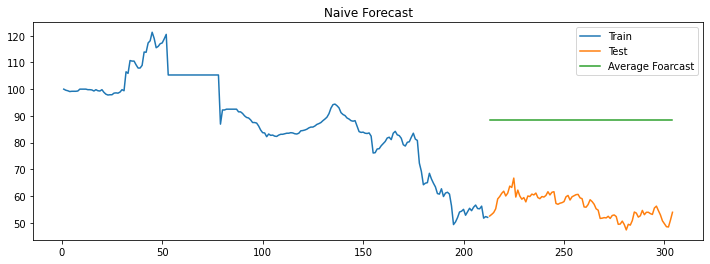

In [624]:
# Plot train, test, foarcast
plt.figure(figsize=(12,4))
plt.plot(train_exch['Exchange Rate TWI'], label='Train')
plt.plot(test_exch['Exchange Rate TWI'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Foarcast')
plt.title('Naive Forecast')
plt.legend(loc='best')
plt.show()

In [625]:
# Forecast using Naive method
y_hat_naive = test_exch.copy()
y_hat_naive['naive_forecast'] = train_exch['Exchange Rate TWI'][train_len_exch-1]
y_hat_naive.tail()
# 211 52.3 
# 212 52.0 

,Exchange Rate TWI,naive_forecast
Month,,
300,49.6,52.3
301,48.5,52.3
302,48.4,52.3
303,51.0,52.3
304,53.9,52.3


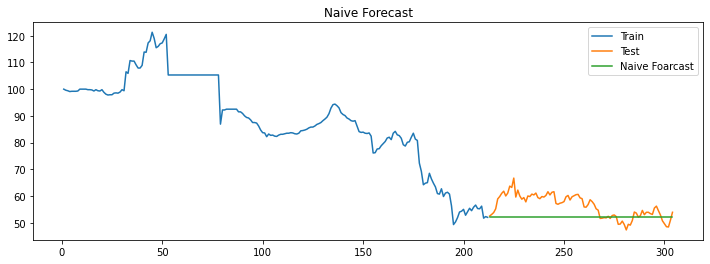

In [626]:
# Plot train, test, foarcast
plt.figure(figsize=(12,4))
plt.plot(train_exch['Exchange Rate TWI'], label='Train')
plt.plot(test_exch['Exchange Rate TWI'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive Foarcast')
plt.title('Naive Forecast')
plt.legend(loc='best')
plt.show()

In [627]:
# Simple Average Method RMSE and MAPE.
rmse = np.sqrt(mean_squared_error(test_exch['Exchange Rate TWI'],y_hat_avg['avg_forecast'])).round(2)
mape = round(np.mean(np.abs(test_exch['Exchange Rate TWI']-y_hat_avg['avg_forecast'])/test_exch['Exchange Rate TWI'])*100)

In [628]:
print(rmse,mape)

32.42 58.0


In [629]:
# Naive Method
rmse = np.sqrt(mean_squared_error(test_exch['Exchange Rate TWI'],y_hat_naive['naive_forecast'])).round(2)
mape = round(np.mean(np.abs(test_exch['Exchange Rate TWI']-y_hat_naive['naive_forecast'])/test_exch['Exchange Rate TWI'])*100)

In [630]:
print(rmse,mape)

5.78 8.0


In [631]:
100-mape

92.0

#### Simple Moving Average Method

In [632]:
y_hat_exch_sma = exch.copy()
ma_window = 3
y_hat_exch_sma['sma_forecast'] = y_hat_exch_sma['Exchange Rate TWI'].rolling(ma_window).mean()
y_hat_exch_sma['sma_forecast'][train_len_exch:] = y_hat_exch_sma['sma_forecast'][train_len_exch-1]

In [633]:
test_exch['Exchange Rate TWI'].shape
y_hat_exch_sma['sma_forecast'][train_len_exch:].shape

(92,)

In [634]:
# RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test_exch['Exchange Rate TWI'],y_hat_exch_sma['sma_forecast'][train_len_exch:])).round(2)
mape = round(np.mean(np.abs(test_exch['Exchange Rate TWI']-y_hat_exch_sma['sma_forecast'][train_len_exch:])/test_exch['Exchange Rate TWI']*100),2)

In [635]:
print(rmse, mape)
# 12 Month Window 4.57 6.89
# 6 Month Window 4.58 6.9  
# 3 Month Window 5.1 7.32  5.98 and 8.41 respectively

5.1 7.32


## Stationary Check

### kpss test

In [743]:
# Test
from statsmodels.tsa.stattools import kpss
kpss_exch = kpss(exch['Exchange Rate TWI'])

kpss_exch

(1.7258967599333663,
 0.01,
 16,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

#### ADF Test

In [741]:
from statsmodels.tsa.stattools import adfuller
adf_exch = adfuller(exch['Exchange Rate TWI'])
adf_exch

(-0.8054678720541538,
 0.8175106426685049,
 0,
 303,
 {'1%': -3.4521175397304784,
  '5%': -2.8711265007266666,
  '10%': -2.571877823851692},
 1268.8696918056114)

### Practice Question End

## Simple moving average method

In [35]:
y_hat_sma = data.copy()
ma_windod = 12
y_hat_sma['sma_forecast'] = y_hat_sma['Passengers'].rolling(ma_windod).mean().round(2)
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

In [36]:
y_hat_sma.tail()

,Passengers,sma_forecast
Month,,
1986-01-01,628,405.75
1986-02-01,308,405.75
1986-03-01,324,405.75
1986-04-01,248,405.75
1986-05-01,272,405.75


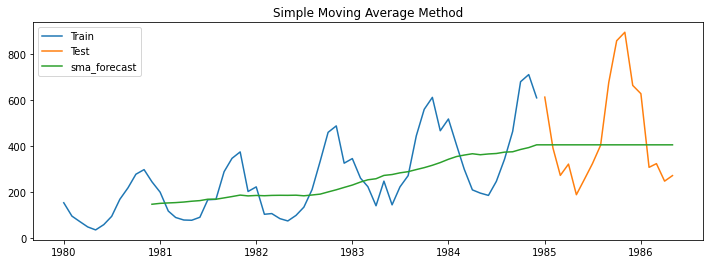

In [37]:
# Plot Train, Test, forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='sma_forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

#### Calculating RMSE and MAPE

In [38]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = round(np.mean(np.abs(test['Passengers']-y_hat_sma['sma_forecast'][train_len:])/test['Passengers']*100),2)
tempResult = pd.DataFrame({'Method':['Simple Moving Average'], 'RMSE':[rmse],'MAPE':[mape]})
results = pd.concat([results,tempResult])

In [39]:
results

,Method,RMSE,MAPE
0,Naive method,269.95,76.86
0,Average method,290.39,34.18
0,Simple Moving Average,221.78,41.27


# Simple exponential smoothig
-- captures the level of a time series

In [40]:
# Importing libraries
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Passengers'])
model_fit = model.fit(smoothing_level=0.2, optimized=False)
#model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

C:\Users\z0038b4f\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [41]:
y_hat_ses.shape

(17, 2)

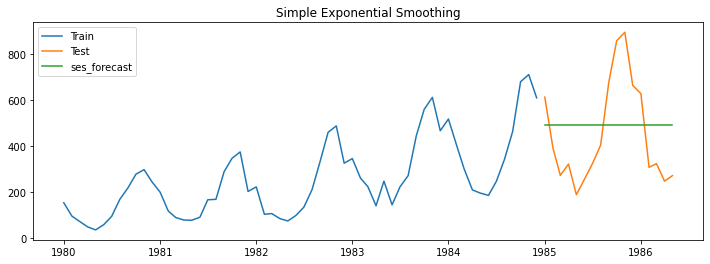

In [42]:
# Plot Train, Test, forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='ses_forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing')
plt.show()

In [43]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_ses['ses_forecast'])).round(2)
mape = round(np.mean(np.abs(test['Passengers']-y_hat_ses['ses_forecast'])/test['Passengers']*100),2)
tempResult = pd.DataFrame({'Method':['Simple Exponential Smoothing'], 'RMSE':[rmse],'MAPE':[mape]})
results = pd.concat([results,tempResult])

In [44]:
results

,Method,RMSE,MAPE
0,Naive method,269.95,76.86
0,Average method,290.39,34.18
0,Simple Moving Average,221.78,41.27
0,Simple Exponential Smoothing,221.61,56.50


# Daily Temperature Practice Start

In [646]:
dtemp = pd.read_csv('Daily+temperature+data.csv')

In [647]:
# Reindexing , setting Date as index
dtemp = dtemp.set_index('Date')

In [648]:
dtemp.head()

,Temperature(Min)
Date,
01-01-2017,14.3
01-02-2017,17.4
01-03-2017,18.5
01-04-2017,16.8
01-05-2017,11.5


##### Split data in Train and Test

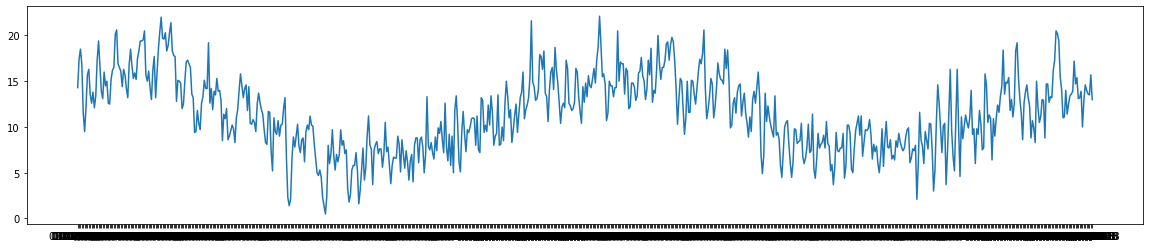

In [649]:
plt.figure(figsize=(20,4))
plt.plot(dtemp)
plt.show()

In [650]:
# Use the first 511 rows as the train data
tain_dt_len = 511
train_dt = dtemp[0:tain_dt_len]
test_dt = dtemp[tain_dt_len:]

In [651]:
len(test_dt)

219

In [652]:
# Simple Exponential Smoothing 
method = SimpleExpSmoothing(train_dt['Temperature(Min)'])
method_fit = method.fit(smoothing_level=.2, optimized=False)
y_hat_dtemp = test_dt.copy()
y_hat_dtemp['ses_forecast'] = method_fit.forecast(len(test_dt))

In [653]:
rmse = np.sqrt(mean_squared_error(test_dt['Temperature(Min)'],y_hat_dtemp['ses_forecast'])).round(2)
mape = round(np.mean(np.abs(test_dt['Temperature(Min)']-y_hat_dtemp['ses_forecast'])/test_dt['Temperature(Min)']*100),2)

In [654]:
print(rmse, mape)

3.56 30.24


### Holts Method

In [655]:
# Importing Libraries
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [656]:
# model_dt = ExponentialSmoothing(np.array(train_dt['Temperature(Min)']), seasonal_periods=12, trend = 'additive', seasonal=None)
model_dt = ExponentialSmoothing(np.array(train_dt['Temperature(Min)']), seasonal_periods=30, trend = 'additive', seasonal='add')
# model_dt_fit = model_dt.fit(smoothing_level=0.5,smoothing_slope=0.01, optimized=False)
model_dt_fit = model_dt.fit(optimized=True)
y_hat_dt_hwa_opt = test_dt.copy()
y_hat_dt_hwa_opt['hwa_forecast'] = model_dt_fit.forecast(len(test_dt))

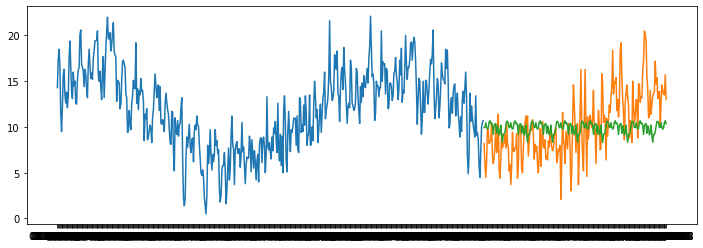

In [657]:
plt.figure(figsize=(12,4))
plt.plot(train_dt['Temperature(Min)'], label='Train')
plt.plot(test_dt['Temperature(Min)'], label='Test')
plt.plot(y_hat_dt_hwa_opt['hwa_forecast'], label='Forecast')

In [658]:
rmse = np.sqrt(mean_squared_error(test_dt['Temperature(Min)'],y_hat_dt_hwa_opt['hwa_forecast'])).round(2)
mape = round(np.mean(np.abs(test_dt['Temperature(Min)']-y_hat_dt_hwa_opt['hwa_forecast'])/test_dt['Temperature(Min)']*100),2)

In [659]:
print(rmse, mape)

3.5 32.83


# Daily Temperature Practice End

# Holt Exponential Smoothing
- On Aitline Passenger Traffic

In [660]:
# Importing required Libraries
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [661]:
model = ExponentialSmoothing(np.array(train['Passengers']), seasonal_periods=12, trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 112.0, 'initial_slope': 6.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


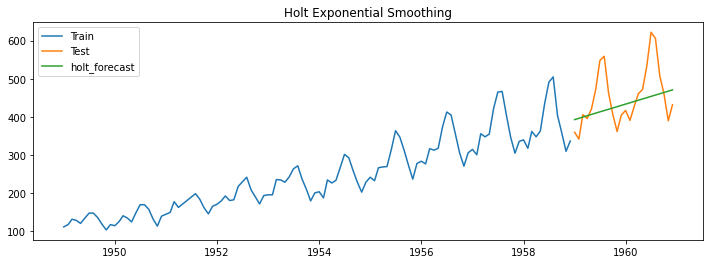

In [662]:
# Plot Train, Test, Forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='holt_forecast')
plt.legend(loc='best')
plt.title('Holt Exponential Smoothing')
plt.show()

In [663]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_holt['holt_forecast'])).round(2)
mape = round(np.mean(np.abs(test['Passengers']-y_hat_holt['holt_forecast'])/test['Passengers']*100),2)
tempResult = pd.DataFrame({'Method':['Holt Exponential Smoothing'], 'RMSE':[rmse],'MAPE':[mape]})
results = pd.concat([results,tempResult])
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Average method,219.69,44.28
0,Simple Moving Average,103.33,15.54
0,Simple Exponential Smoothing,107.65,16.49
0,Holt Exponential Smoothing,71.94,11.11


# Holt's Winter Additive with treds and seanality

In [664]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods=12, trend = 'add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hwa_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2631578931410015, 'smoothing_slope': 0.05162966025765116, 'smoothing_seasonal': 0.7368421036673173, 'damping_slope': nan, 'initial_level': 211.55099866332293, 'initial_slope': 1.7391915752033313, 'initial_seasons': array([-100.18118437,  -94.2046477 ,  -80.29175565,  -83.41758365,
        -91.45908078,  -77.4509434 ,  -64.48324357,  -64.57340564,
        -76.66644176,  -93.73584142, -108.67610965,  -94.50947707]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


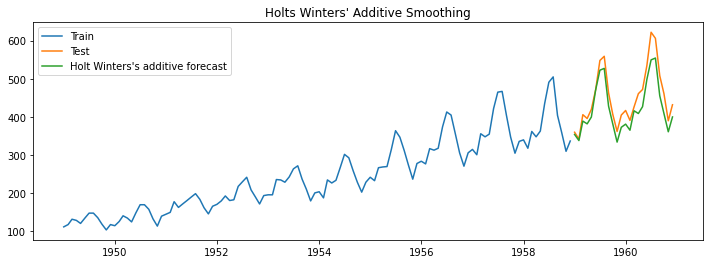

In [665]:
# Plot Train, Test, Forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_hwa['hwa_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holts Winters\' Additive Smoothing')
plt.show()

In [666]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_hwa['hwa_forecast'])).round(2)
mape = round(np.mean(np.abs(test['Passengers']-y_hat_hwa['hwa_forecast'])/test['Passengers']*100),2)
tempResult = pd.DataFrame({'Method':['Holt Winters\'s Additive'], 'RMSE':[rmse],'MAPE':[mape]})
results = pd.concat([results,tempResult])
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Average method,219.69,44.28
0,Simple Moving Average,103.33,15.54
0,Simple Exponential Smoothing,107.65,16.49
0,Holt Exponential Smoothing,71.94,11.11
0,Holt Winters's Additive,35.10,6.53


# Holt Winters Mutiplicative

In [667]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods=12, trend = 'add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hwm_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.38297792357726124, 'smoothing_slope': 0.035502695358352605, 'smoothing_seasonal': 0.6170220681283785, 'damping_slope': nan, 'initial_level': 212.3983506469908, 'initial_slope': 1.095376632423797, 'initial_seasons': array([0.51702061, 0.5454338 , 0.60215765, 0.56916567, 0.51982655,
       0.57235007, 0.62776238, 0.62555286, 0.57005795, 0.49511555,
       0.43967716, 0.51387414]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


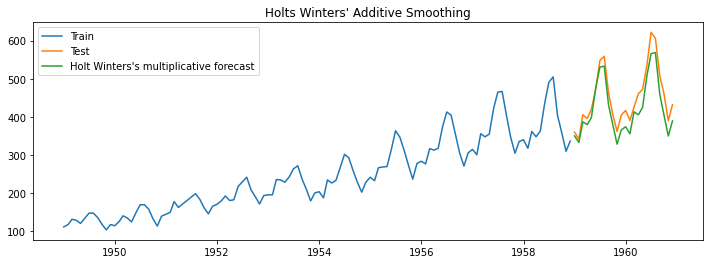

In [668]:
# Plot Train, Test, Forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_hwm['hwm_forecast'], label='Holt Winters\'s multiplicative forecast')
plt.legend(loc='best')
plt.title('Holts Winters\' Additive Smoothing')
plt.show()

In [669]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_hwm['hwm_forecast'])).round(2)
mape = round(np.mean(np.abs(test['Passengers']-y_hat_hwm['hwm_forecast'])/test['Passengers']*100),2)
tempResult = pd.DataFrame({'Method':['Holt Winters\'s Additive'], 'RMSE':[rmse],'MAPE':[mape]})
results = pd.concat([results,tempResult])
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Average method,219.69,44.28
0,Simple Moving Average,103.33,15.54
0,Simple Exponential Smoothing,107.65,16.49
0,Holt Exponential Smoothing,71.94,11.11
0,Holt Winters's Additive,35.10,6.53
0,Holt Winters's Additive,34.87,6.92


# Graded Questions Start

In [670]:
bit = pd.read_csv('bitcoinfinal+(4).csv', header=None)
bit.columns = ['Month','Price']
bit =bit.set_index('Month')

In [671]:
bit.head()

,Price
Month,
0,217.4
1,255.7
2,244.3
3,236.1
4,228.7


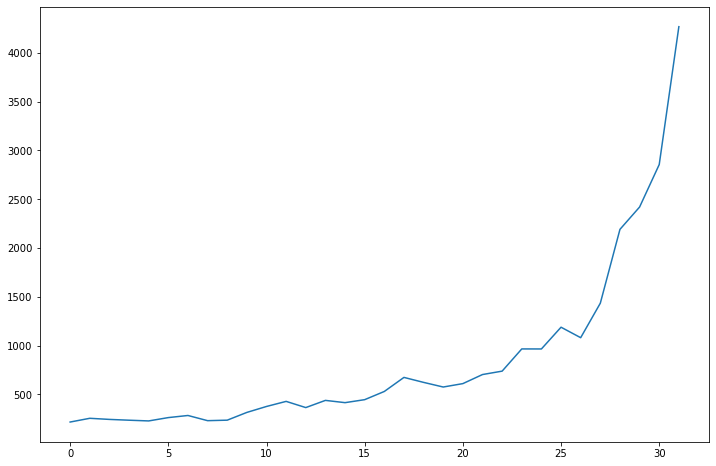

In [672]:
plt.plot(bit)

# Train Test Split

In [673]:
bit.shape

(32, 1)

In [674]:
# train data (first 29 months) and test data (last 3 months)
bittrain_len=29
bittrain = bit[0:bittrain_len]
bittest = bit[bittrain_len:]

In [675]:
print(bittrain.shape)
print(bittest.shape)

(29, 1)
(3, 1)


In [676]:
# Naive Method
y_hat_naive_bit = bittest.copy()
y_hat_naive_bit['naive_forecast'] = bittrain['Price'][bittrain_len-1].round(2)   # 2191.8

In [677]:
y_hat_naive_bit

,Price,naive_forecast
Month,,
29,2420.7,2191.8
30,2856.0,2191.8
31,4268.8,2191.8


In [678]:
# Simple Average Method
y_hat_sam_bit = bittest.copy()
y_hat_sam_bit['sam_forecast'] = bittrain['Price'].mean().round(2)

In [679]:
y_hat_sam_bit

,Price,sam_forecast
Month,,
29,2420.7,595.75
30,2856.0,595.75
31,4268.8,595.75


In [680]:
# Calculate RMSE and MAPE
# For the Naive method
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(bittest['Price'],y_hat_naive_bit['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(bittest['Price']-y_hat_naive_bit['naive_forecast'])/bittest['Price'])*100,2)

In [681]:
# Creating dataframe to compare result
bitresults = pd.DataFrame({'Method': ['Naive method'], 'RMSE':[rmse], 'MAPE':[mape]})
bitresults

,Method,RMSE,MAPE
0,Naive method,1265.9,27.12


In [682]:
# RMSE and MAPE for Simple Average Method
rmse = np.sqrt(mean_squared_error(bittest['Price'],y_hat_sam_bit['sam_forecast'])).round(2)
mape = np.round(np.mean(np.abs(bittest['Price']-y_hat_sam_bit['sam_forecast'])/bittest['Price'])*100,2)

In [683]:
# Simple Average Method
tempResult = pd.DataFrame({'Method':['Simple Average method'], 'RMSE':[rmse], 'MAPE':[mape]})
bitresults = pd.concat([bitresults,tempResult])
bitresults

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple Average method,2703.73,80.19


Lower the MAPE, more accurate the model.

### Forecast the average bitcoin price for the months 30 to 32, using the Simple Moving Average forecast method with a window size of 12 months

In [684]:
# Simple Moving Average Method
ma_window = 12
y_hat_sma = bit.copy()
y_hat_sma['sma_forecast_12']= y_hat_sma['Price'].rolling(ma_window).mean().round(2)
y_hat_sma['sma_forecast_12'][bittrain_len:] = y_hat_sma['sma_forecast_12'][bittrain_len-1]

In [685]:
y_hat_sma.tail()

,Price,sma_forecast_12
Month,,
27,1435.2,841.53
28,2191.8,979.95
29,2420.7,979.95
30,2856.0,979.95
31,4268.8,979.95


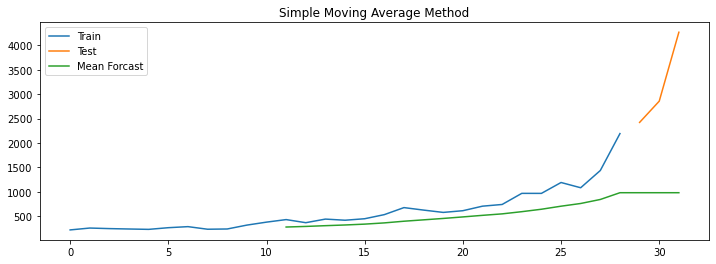

In [686]:
# Plotting train, test, forcast
plt.figure(figsize=(12,4))
plt.plot(bittrain['Price'], label='Train')
plt.plot(bittest['Price'], label='Test')
plt.plot(y_hat_sma['sma_forecast_12'], label='Mean Forcast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [687]:
y_hat_sma['sma_forecast_12'][bittrain_len:]
bit['Price'][bittrain_len:]

Month
29    2420.7
30    2856.0
31    4268.8
Name: Price, dtype: float64

In [688]:
# RMSE and MAPE for Simple Average Method
rmse = np.sqrt(mean_squared_error(bittest['Price'],y_hat_sma['sma_forecast_12'][bittrain_len:])).round(2)
mape = np.round(np.mean(np.abs(bittest['Price']-y_hat_sma['sma_forecast_12'][bittrain_len:])/bittest['Price'])*100,2)

In [689]:
# Simple Moving Average Method
tempResult = pd.DataFrame({'Method':['Simple Moving Average 12months Window'], 'RMSE':[rmse], 'MAPE':[mape]})
bitresults = pd.concat([bitresults,tempResult])
bitresults

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple Average method,2703.73,80.19
0,Simple Moving Average 12months Window,2338.94,67.42


In [690]:
# Simple Moving Average Method
ma_window = 6
y_hat_sma = bit.copy()
y_hat_sma['sma_forecast_6']= y_hat_sma['Price'].rolling(ma_window).mean().round(2)
y_hat_sma['sma_forecast_6'][bittrain_len:] = y_hat_sma['sma_forecast_6'][bittrain_len-1]

# RMSE and MAPE for Simple Average Method
rmse = np.sqrt(mean_squared_error(bittest['Price'],y_hat_sma['sma_forecast_6'][bittrain_len:])).round(2)
mape = np.round(np.mean(np.abs(bittest['Price']-y_hat_sma['sma_forecast_6'][bittrain_len:])/bittest['Price'])*100,2)

# Simple Moving Average Method
tempResult = pd.DataFrame({'Method':['Simple Moving Average 6months Window'], 'RMSE':[rmse], 'MAPE':[mape]})
bitresults = pd.concat([bitresults,tempResult])
bitresults

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple Average method,2703.73,80.19
0,Simple Moving Average 12months Window,2338.94,67.42
0,Simple Moving Average 6months Window,2035.79,56.61


In [691]:
# Simple Moving Average Method
ma_window = 3
y_hat_sma = bit.copy()
y_hat_sma['sma_forecast_3']= y_hat_sma['Price'].rolling(ma_window).mean().round(2)
y_hat_sma['sma_forecast_3'][bittrain_len:] = y_hat_sma['sma_forecast_3'][bittrain_len-1]

# RMSE and MAPE for Simple Average Method
rmse = np.sqrt(mean_squared_error(bittest['Price'],y_hat_sma['sma_forecast_3'][bittrain_len:])).round(2)
mape = np.round(np.mean(np.abs(bittest['Price']-y_hat_sma['sma_forecast_3'][bittrain_len:])/bittest['Price'])*100,2)

# Simple Moving Average Method
tempResult = pd.DataFrame({'Method':['Simple Moving Average 3months Window'], 'RMSE':[rmse], 'MAPE':[mape]})
bitresults = pd.concat([bitresults,tempResult])
bitresults

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple Average method,2703.73,80.19
0,Simple Moving Average 12months Window,2338.94,67.42
0,Simple Moving Average 6months Window,2035.79,56.61
0,Simple Moving Average 3months Window,1794.92,47.81


In [692]:
# Simple Exponential Smoothing model with an optimized smoothing level
#importing required libraries
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [693]:
model = SimpleExpSmoothing(np.array(bittrain['Price']))
model_fit = model.fit(optimized=True)
y_hat_ses_bit = bittest.copy()
y_hat_ses_bit['ses_forecast'] = model_fit.forecast(3)

In [694]:
model_fit.params

{'smoothing_level': 1.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 217.403610619585,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [695]:
rmse = np.sqrt(mean_squared_error(bittest['Price'], y_hat_ses_bit['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(bittest['Price']-y_hat_ses_bit['ses_forecast'])/bittest['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
bitresults = pd.concat([bitresults, tempResults])
bitresults

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple Average method,2703.73,80.19
0,Simple Moving Average 12months Window,2338.94,67.42
0,Simple Moving Average 6months Window,2035.79,56.61
0,Simple Moving Average 3months Window,1794.92,47.81
0,Simple exponential smoothing forecast,1265.90,27.12


# Holts Winter Exponential Smoothing

In [696]:
# importing required libtraries
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [697]:
model = ExponentialSmoothing(np.array(bittrain['Price']), seasonal_periods=12, trend='add', seasonal=None)
model_fit = model.fit(optimized=True)
y_hat_hwa_bit = bittest.copy()
y_hat_hwa_bit['hwa_forecast'] = model_fit.forecast(3)

In [698]:
model_fit.params

{'smoothing_level': 1.0,
 'smoothing_slope': 0.42166543817420776,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 203.68784435912738,
 'initial_slope': 13.714211507493342,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

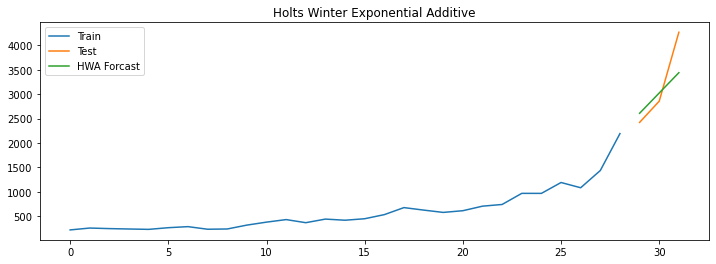

In [699]:
# Plotting train, test, forcast
plt.figure(figsize=(12,4))
plt.plot(bittrain['Price'], label='Train')
plt.plot(bittest['Price'], label='Test')
plt.plot(y_hat_hwa_bit['hwa_forecast'], label='HWA Forcast')
plt.legend(loc='best')
plt.title('Holts Winter Exponential Additive')
plt.show()

In [700]:
rmse = np.sqrt(mean_squared_error(bittest['Price'], y_hat_hwa_bit['hwa_forecast'])).round(2)
mape = np.round(np.mean(np.abs(bittest['Price']-y_hat_hwa_bit['hwa_forecast'])/bittest['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holts Winter Exponential Additive'], 'RMSE': [rmse],'MAPE': [mape] })
bitresults = pd.concat([bitresults, tempResults])
bitresults

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple Average method,2703.73,80.19
0,Simple Moving Average 12months Window,2338.94,67.42
0,Simple Moving Average 6months Window,2035.79,56.61
0,Simple Moving Average 3months Window,1794.92,47.81
0,Simple exponential smoothing forecast,1265.90,27.12
0,Holts Winter Exponential Additive,500.11,11.01


In [701]:
# Graded Set2 Question 2
model = ExponentialSmoothing(np.array(bittrain['Price']), seasonal_periods=3, trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
y_hat_hwa_bit_add = bittest.copy()
y_hat_hwa_bit_add['hwa_forecast'] = model_fit.forecast(3)

rmse = np.sqrt(mean_squared_error(bittest['Price'], y_hat_hwa_bit_add['hwa_forecast'])).round(2)
mape = np.round(np.mean(np.abs(bittest['Price']-y_hat_hwa_bit_add['hwa_forecast'])/bittest['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holts Winter Exponential Additive SPeriod 3'], 'RMSE': [rmse],'MAPE': [mape] })
bitresults = pd.concat([bitresults, tempResults])
bitresults

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple Average method,2703.73,80.19
0,Simple Moving Average 12months Window,2338.94,67.42
0,Simple Moving Average 6months Window,2035.79,56.61
0,Simple Moving Average 3months Window,1794.92,47.81
0,Simple exponential smoothing forecast,1265.90,27.12
0,Holts Winter Exponential Additive,500.11,11.01
0,Holts Winter Exponential Additive SPeriod 3,509.49,10.26


In [702]:
# Graded Set2 Question 2
model = ExponentialSmoothing(np.array(bittrain['Price']), seasonal_periods=3, trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
y_hat_hwa_bit_mul = bittest.copy()
y_hat_hwa_bit_mul['hwa_forecast'] = model_fit.forecast(3)

rmse = np.sqrt(mean_squared_error(bittest['Price'], y_hat_hwa_bit_mul['hwa_forecast'])).round(2)
mape = np.round(np.mean(np.abs(bittest['Price']-y_hat_hwa_bit_mul['hwa_forecast'])/bittest['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holts Winter Exponential Multplicative SPeriod 3'], 'RMSE': [rmse],'MAPE': [mape] })
bitresults = pd.concat([bitresults, tempResults])
bitresults

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple Average method,2703.73,80.19
0,Simple Moving Average 12months Window,2338.94,67.42
0,Simple Moving Average 6months Window,2035.79,56.61
0,Simple Moving Average 3months Window,1794.92,47.81
0,Simple exponential smoothing forecast,1265.90,27.12
0,Holts Winter Exponential Additive,500.11,11.01
0,Holts Winter Exponential Additive SPeriod 3,509.49,10.26
0,Holts Winter Exponential Multplicative SPeriod 3,735.31,15.38


# Graded Questions End

# Auto Regressive Methods

## Statationary vs Non-stationary time series

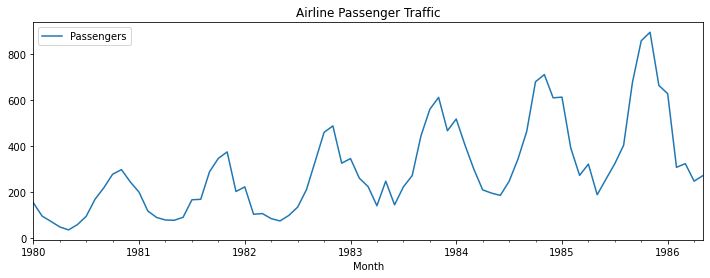

In [45]:
# Plotting the Time series plot for passenger data
data['Passengers'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline Passenger Traffic')
plt.show()

By visualising itself, we can say that is not stationary time series as mean is changing over the time

#### Formal Test for stationarity

#### Augemented Dicky Fuller Test

In [46]:
# importing statsmodel library for adfuller test
from statsmodels.tsa.stattools import adfuller

In [47]:
# Test
adf_test = adfuller(data['Passengers'])
print('ADF Statistics %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f'% adf_test[4]['5%'])
print('p-value %f' % adf_test[1])

ADF Statistics 0.581906
Critical Values @ 0.05: -2.91
p-value 0.987161


In [48]:
adf_test

(0.5819064761511071,
 0.987161059552855,
 12,
 64,
 {'1%': -3.53692771987915,
  '5%': -2.907887369384766,
  '10%': -2.591493291015625},
 703.2231100041784)

### KPSS Test

In [49]:
# importing required library
from statsmodels.tsa.stattools import kpss

In [50]:
# Test
kpss_test = kpss(data['Passengers'])
print('KPSS Statistics: %f' %kpss_test[0])
print('Critical values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p values: %f' % kpss_test[1])


KPSS Statistics: 0.657628
Critical values @ 0.05: 0.46
p values: 0.017397


In [51]:
kpss_test

(0.6576276787394588,
 0.017397483750958287,
 12,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

# Box Cox Transformation
-- Power transformation

In [52]:
# Importing required library
from scipy.stats import boxcox

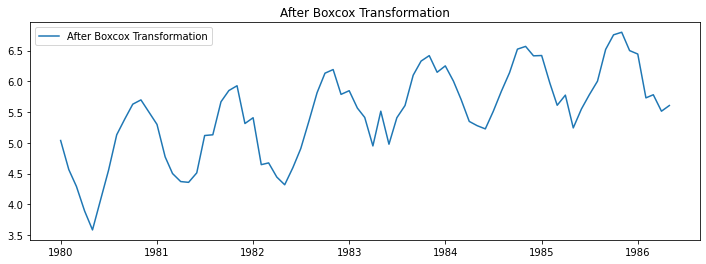

In [53]:
data_boxcox = pd.Series(boxcox(data['Passengers'], lmbda=0), index=data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Boxcox Transformation')
plt.legend(loc='best')
plt.title('After Boxcox Transformation')
plt.show()

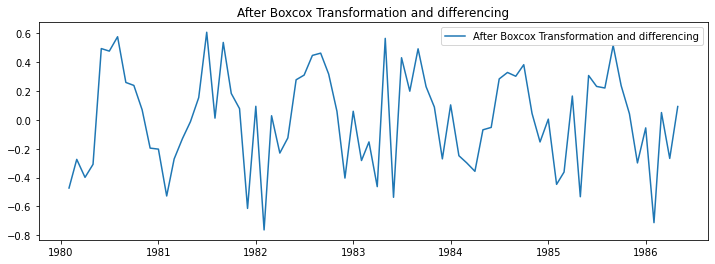

In [54]:
# Differencing
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift())
data_boxcox_diff.dropna(inplace=True)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Boxcox Transformation and differencing')
plt.legend(loc='best')
plt.title('After Boxcox Transformation and differencing')
plt.show()

In [55]:
# Stationarity Check
# Augmented Dickney Fuller Test
data_adf_test = adfuller(data_boxcox_diff)
print('ADF Statistics: %f' % data_adf_test[0])
print('Critical Values @ 0.05: %.2f' % data_adf_test[4]['5%'])
print('P-value: %f' % data_adf_test[1])

ADF Statistics: -8.348568
Critical Values @ 0.05: -2.91
P-value: 0.000000


P-value is less than .05 and also ADF Statistics is less than Critical Value, we can say that data is stationary

In [56]:
# KPSS Test
data_kpss_test = kpss(data_boxcox_diff)
print('KPSS Statistics: %f' % data_kpss_test[0])
print('Critical Values @ 0.05: %.2f' % data_kpss_test[3]['5%'])
print('P-value: %f' % data_kpss_test[1])

KPSS Statistics: 0.225247
Critical Values @ 0.05: 0.46
P-value: 0.100000


C:\Users\z0038b4f\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [57]:
data_boxcox_diff.shape

(76,)

# Plotting Autocorrelation Function(ACF)

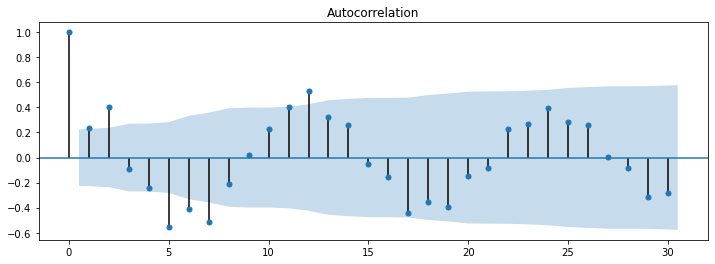

In [58]:
# Plotting Autocorrelation Function to find the number of p(lag order)
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(),lags=30)
plt.show()

# Plotting Partial Autocorrelation Function(PACF)

In [59]:
# Importing required library
from statsmodels.graphics.tsaplots import plot_pacf

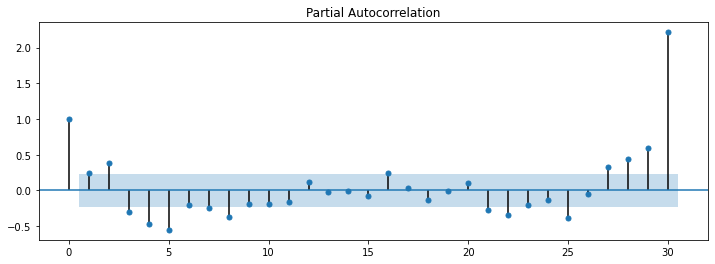

In [60]:
# Checking partial auto correlation
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

# Train and Test Split of the data

In [61]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [62]:
train_data_boxcox_diff.shape

(59,)

# Auto regressive Model(AR)

In [63]:
# Importing the required library
from statsmodels.tsa.arima_model import ARIMA

In [64]:
model = ARIMA(train_data_boxcox_diff, order=(1,0,0))
model_fit = model.fit()
print(model_fit.params)

const      0.019061
ar.L1.y    0.275033
dtype: float64


C:\Users\z0038b4f\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


# Recover original time series

In [65]:
# Recovery the original series
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox']=y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot train, test, forecast

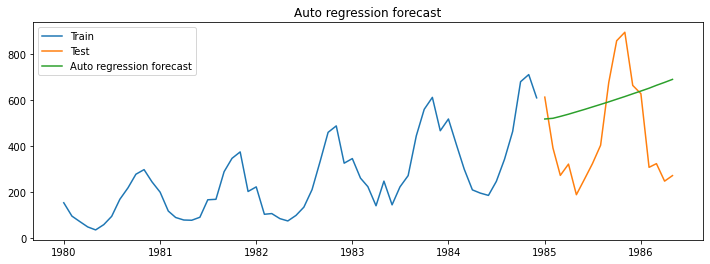

In [66]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto regression forecast')
plt.show()

# Calculate RMSE and MAPE

In [67]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(y_hat_ar['ar_forecast'][test.index.min():]-test['Passengers'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Auto Regressive Model(AR)'], 'RMSE':[rmse], 'MAPE':[mape]})
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,269.95,76.86
0,Average method,290.39,34.18
0,Simple Moving Average,221.78,41.27
0,Simple Exponential Smoothing,221.61,56.50
0,Auto Regressive Model(AR),265.25,74.23


# Moving Average Model(MA)

In [68]:
# Creating model Moving Average Window
model = ARIMA(train_data_boxcox_diff, order=(0,0,1))
model_fit = model.fit()
print(model_fit.params)

const      0.021747
ma.L1.y    0.148358
dtype: float64


C:\Users\z0038b4f\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


# Recovery the original time series

In [69]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

#### Plot Train, test and forecast

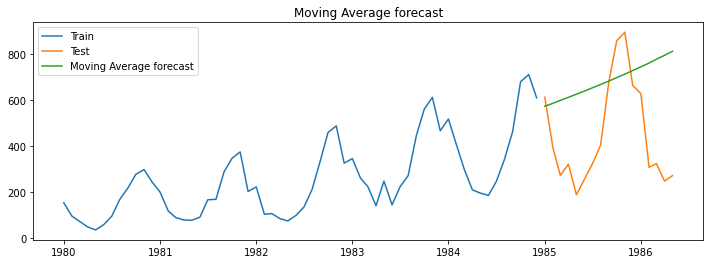

In [70]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving Average forecast')
plt.legend(loc='best')
plt.title('Moving Average forecast')
plt.show()

### RMSE and MAPE result

In [71]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = round(np.mean(np.abs(test['Passengers']-y_hat_ma['ma_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average(MA) Method'], 'RMSE':[rmse],'MAPE':[mape]})
results = pd.concat([results,tempResults])
results

,Method,RMSE,MAPE
0,Naive method,269.95,76.86
0,Average method,290.39,34.18
0,Simple Moving Average,221.78,41.27
0,Simple Exponential Smoothing,221.61,56.50
0,Auto Regressive Model(AR),265.25,74.23
0,Moving Average(MA) Method,327.57,93.36


# ARMA Model(Autoregressive and Moving Average)

In [72]:
model = ARIMA(train_data_boxcox_diff, order=(4,0,3))
model_fit = model.fit()
print(model_fit.params)

C:\Users\z0038b4f\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const      0.019244
ar.L1.y    0.257272
ar.L2.y    1.092253
ar.L3.y   -0.641709
ar.L4.y   -0.480929
ma.L1.y   -0.807334
ma.L2.y   -0.764253
ma.L3.y    0.977573
dtype: float64


In [76]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

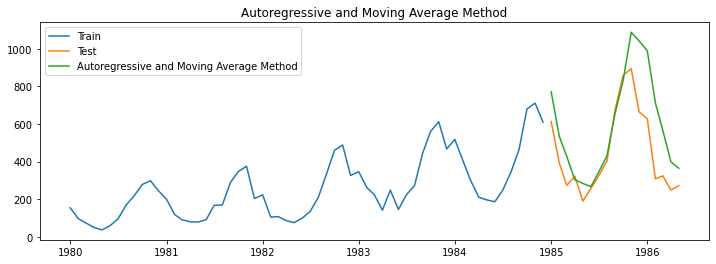

In [77]:
# Plot Train, Test and Forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test_data_boxcox.index.min():], label='Autoregressive and Moving Average Method')
plt.legend(loc='best')
plt.title('Autoregressive and Moving Average Method')
plt.show()

In [78]:
# RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_arma['arma_forecast'][test.index.min():])).round(2)
mape = round(np.mean(np.abs(test['Passengers']-y_hat_arma['arma_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Auto Regressive and Moving Average(ARMA) Method'], 'RMSE':[rmse],'MAPE':[mape]})
results = pd.concat([results,tempResults])
results

,Method,RMSE,MAPE
0,Naive method,269.95,76.86
0,Average method,290.39,34.18
0,Simple Moving Average,221.78,41.27
0,Simple Exponential Smoothing,221.61,56.50
0,Auto Regressive Model(AR),265.25,74.23
0,Moving Average(MA) Method,327.57,93.36
0,Auto Regressive and Moving Average(ARMA) Method,139.98,21.52
0,Auto Regressive and Moving Average(ARMA) Method,194.81,37.31
